In [1]:
# COIL Pre/Post Survey Analysis in Google Colab
# Author: [Marzell Gray]
# Date: [April 2025]
# Description: Statistical analysis of pre- and post-survey data for intercultural competence.

import pandas as pd
import numpy as np
from scipy import stats

=== COIL Pre/Post Survey Analysis Results ===
                                         Variable  Mean Change  p-value  \
0                         Cultural Self-Awareness        0.294   0.0515   
1      Knowledge of Cultural Worldview Frameworks        0.411   0.0158   
2                                         Empathy        0.482   0.0013   
3              Verbal and Nonverbal Communication        0.181   0.2837   
4                                       Curiosity        0.602   0.0017   
5                                        Openness       -0.219   0.1048   
6  Overall Intercultural Knowledge and Competence        0.164   0.2946   

   Cohen's d  
0      0.371  
1      0.468  
2      0.653  
3      0.199  
4      0.632  
5     -0.306  
6      0.195  


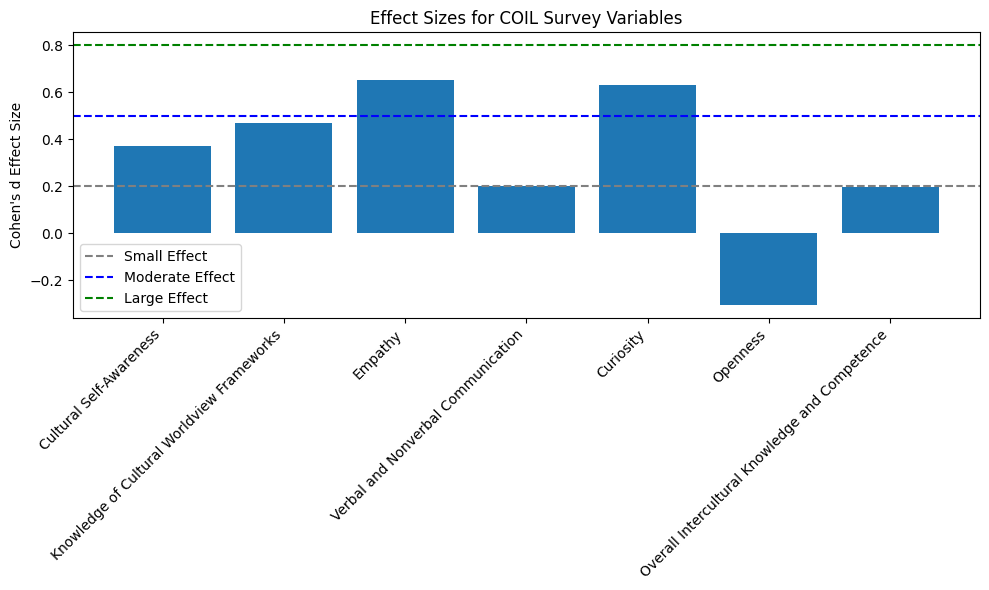

In [2]:
# Create the sample dataset

data = pd.DataFrame({
    'Variable': [
        'Cultural Self-Awareness',
        'Knowledge of Cultural Worldview Frameworks',
        'Empathy',
        'Verbal and Nonverbal Communication',
        'Curiosity',
        'Openness',
        'Overall Intercultural Knowledge and Competence'
    ],
    'Pre_Mean': [3.13, 2.50, 2.93, 2.83, 2.47, 2.90, 2.79],
    'Pre_SD': [0.68, 0.68, 0.45, 0.65, 0.63, 0.71, 0.63],
    'Post_Mean': [3.37, 2.93, 3.23, 3.03, 2.90, 3.03, 3.08],
    'Post_SD': [0.61, 0.52, 0.50, 0.49, 0.76, 0.72, 0.60]
})

# Simulate individual participant scores based on means and SDs

n = 30  # Assuming 30 participants
np.random.seed(42)  # For reproducibility

def simulate_scores(mean, sd, n):
    return np.random.normal(loc=mean, scale=sd, size=n)

results = []

for idx, row in data.iterrows():
    pre_scores = simulate_scores(row['Pre_Mean'], row['Pre_SD'], n)
    post_scores = simulate_scores(row['Post_Mean'], row['Post_SD'], n)

    # Paired t-test
    t_stat, p_val = stats.ttest_rel(post_scores, pre_scores)

    # Calculate Cohen's d
    mean_diff = np.mean(post_scores - pre_scores)
    pooled_sd = np.std(post_scores - pre_scores, ddof=1)
    cohen_d = mean_diff / pooled_sd

    results.append({
        'Variable': row['Variable'],
        'Mean Change': round(mean_diff, 3),
        'p-value': round(p_val, 4),
        "Cohen's d": round(cohen_d, 3)
    })

# Display the results

results_df = pd.DataFrame(results)

print("=== COIL Pre/Post Survey Analysis Results ===")
print(results_df)

# Optional: Visualize the results
import matplotlib.pyplot as plt

# Bar plot of Cohen's d
plt.figure(figsize=(10, 6))
plt.bar(results_df['Variable'], results_df["Cohen's d"])
plt.axhline(0.2, color='gray', linestyle='--', label='Small Effect')
plt.axhline(0.5, color='blue', linestyle='--', label='Moderate Effect')
plt.axhline(0.8, color='green', linestyle='--', label='Large Effect')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Cohen's d Effect Size")
plt.title("Effect Sizes for COIL Survey Variables")
plt.legend()
plt.tight_layout()
plt.show()
